In [5]:
%matplotlib notebook
import sys
sys.path.append('../code')

from mpl_toolkits.mplot3d import Axes3D
from krr import KernelRidgeRegression
from label_data import LabelData
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def k_polynomial(x, xp, d):
    return (np.dot(x, xp)+1)**d


def k_gaussian(x, xp, sigma):
    return np.exp(-np.sum((x-xp)**2)/(2*(sigma**2)))


def k_sigmoid(x, xp, kappa, Theta):
    return np.tanh(kappa * np.dot(x, xp) + Theta)

<IPython.core.display.Javascript object>


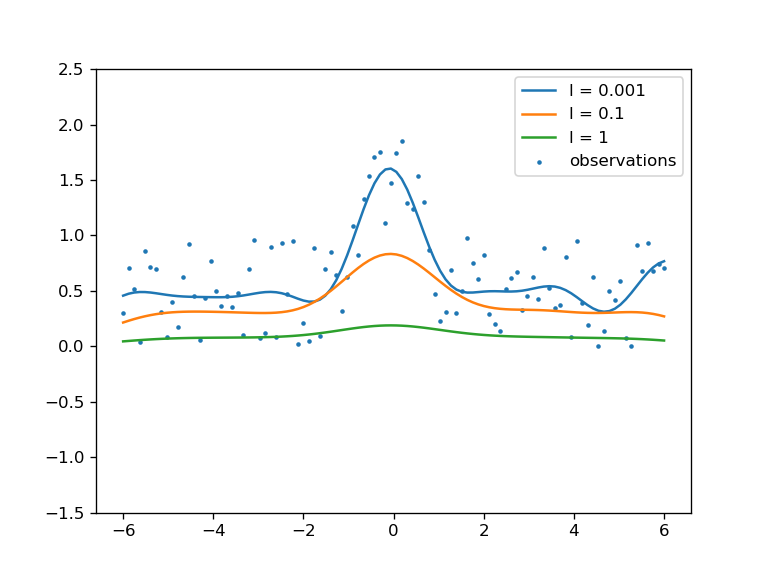

In [7]:
t = np.linspace(-6, 6, 100)
y = np.exp(-t**2)*np.cos(t) + np.random.rand(t.shape[0])

ld = LabelData()
ld.add_data(t, y)

kregr = KernelRidgeRegression(ld, k=lambda x,y: k_gaussian(x, y, 1), l=.01)

plt.figure()
plt.scatter(t, y, label='observations', s=3)
kregr.l = 0.001
plt.plot(t, kregr(t), label='l = 0.001')
kregr.l = 0.1
plt.plot(t, kregr(t), label='l = 0.1')
kregr.l = 1
plt.plot(t, kregr(t), label='l = 1')
plt.legend()
plt.ylim(-1.5, 2.5)
plt.show()

In [8]:
def fun(x, y):
    A = x + y
    return np.array(A > 1, dtype=np.int)
    #return x**2 + y

x = y = np.arange(-3.0, 3.0, 6/30.0)
X, Y = np.meshgrid(x, y)
zs = np.array(fun(np.ravel(X), np.ravel(Y))) + np.random.rand(np.prod(X.shape))*.1
Z = zs.reshape(X.shape)

ld = LabelData()
dat = np.vstack((np.ravel(X), np.ravel(Y))).T
print(dat.shape)
ld.add_data(dat, zs)
kregr = KernelRidgeRegression(ld, k=lambda x,y: k_gaussian(x, y, 1), l=.01)

z_r = kregr(dat)

(900, 2)


<IPython.core.display.Javascript object>


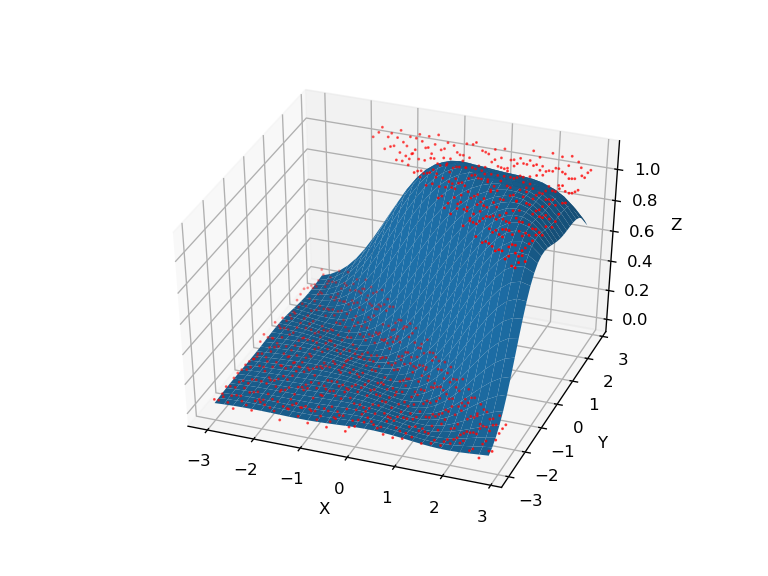

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, s=.5, c='r')
ax.plot_surface(X, Y, z_r.reshape(X.shape))
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()